# Project 5: Capstone Project
### Stock Predictor

## Definition

### 1. Project Overview
In this section, look to provide a high-level overview of the project in layman’s terms. Questions to ask yourself when writing this section:

   * Has an overview of the project been provided, such as the problem domain, project origin, and related datasets or input data?
   * Has enough background information been given so that an uninformed reader would understand the problem domain and following problem statement?


**Background information:** "Stock" is a general term used to describe the ownership certificates of any company, in general, and "shares" refers to a the ownership certificates of a particular company. So, if investors say they own stocks, they are generally referring to their overall ownership in one or more companies. [Stock and Shares](http://www.investopedia.com/ask/answers/140.asp). In addition, many of the more established stocks pay out a dividend quarterly, which can also provide the stockholder with an income. [How to Buy Stocks for Beginners](http://www.wikihow.com/Buy-Stocks-%28for-Beginners%29)

**Problem domain:** The problem domain of this project are the stock prices of companies.
**Project origin:** The project origin is the need to predict the stock prices to help brokers obtain more profit in daily [trading](http://www.investopedia.com/ask/answers/071614/whats-difference-between-binary-options-and-day-trading.asp). Day traders buy and sell a variety of instruments including stocks, currencies, futures, commodities, indices and ETFs. In this case we will be focusing on predicting stocks-in a daily manner.

**Related datasets or input data:** Some of the companies that provide information about stock prices are [Yahoo](http://finance.yahoo.com/), [Google](https://www.google.com/finance) and [Bloomberg](http://www.bloomberg.com/). For this project I have chosen to retrieve stocks data through [Yahoo Finance](http://finance.yahoo.com/stock-center/).

For a *more* **detailed explanation** of what stocks are I recommend you to take a look at the following links:
   * [History of Money](http://spectrum.ieee.org/at-work/innovation/a-brief-history-of-money)
   * [History of Stock Market](https://www.gilderlehrman.org/history-by-era/economics/essays/rise-american-institution-stock-market)
   * [25 Basic Stock Market Trading Terms You Should Know](http://www.timothysykes.com/2013/06/trading-terms-you-need-to-know/)
   * [Glossary of Stock Market terms](http://www.nasdaq.com/investing/glossary/)
   * [Day Trading Strategies](http://smallbusiness.chron.com/predict-daily-stock-market-activity-3391.html)
   * [Day Trading strategies](http://www.daytradingcoach.com/day-trading-strategies.html)

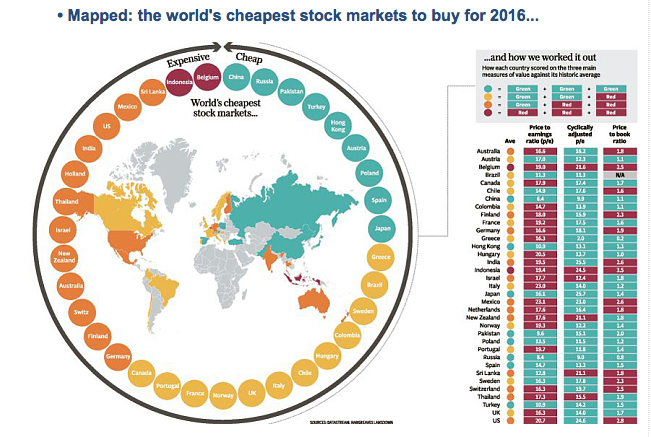

In [1]:
#Image1

#Citation: 
#Oxlade, Andrew. "Time to 'sell Everything'? No, This Is When a 'hold Everything' Strategy Works."
#   The Telegraph. Telegraph Media Group, 15 Jan. 2016. Web. 5 May 2016. 
#   <http://www.telegraph.co.uk/finance/personalfinance/investing/12101740/
#   Time-to-sell-everything-No-this-is-when-a-hold-everything-strategy-works.html>.

In [1]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

### 2. Problem Statement
In this section, you will want to clearly define the problem that you are trying to solve, including the strategy (outline of tasks) you will use to achieve the desired solution. You should also thoroughly discuss what the intended solution will be for this problem. Questions to ask yourself when writing this section:

   * Is the problem statement clearly defined? Will the reader understand what you are expecting to solve?
   * Have you thoroughly discussed how you will attempt to solve the problem?
   * Is an anticipated solution clearly defined? Will the reader understand what results you are looking for?

Considering the volatility of the stock market and having the stock prices of a set of previous days. We use a set of 3 stock prices in total (from the 3 previous dates starting from the current date) to predict the opening price of the stock for the following day by using an ANN (Artificial Neural Network). I will be using an ANN of 3 neurons.

In [2]:
#Image2

In [2]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

### 3. Metrics
In this section, you will need to clearly define the metrics or calculations you will use to measure performance of a model or result in your project. These calculations and metrics should be justified based on the characteristics of the problem and problem domain. Questions to ask yourself when writing this section:

   * Are the metrics you’ve chosen to measure the performance of your models clearly discussed and defined?
   * Have you provided reasonable justification for the metrics chosen based on the problem and solution?

The metrics that I chose to measure the performance of the model are:
   **1)** [F1-score](http://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)
   **2)** [Mean Absolute Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html), (the difference between the model's prediction and the real stock price), and 
   **3)** [Mean Absolute Percentage Error](http://homepage.univie.ac.at/robert.kunst/prognos7.pdf).

I chose **F1-score** because it conveys the balance between [precision and recall](http://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-ranked-retrieval-results-1.html) of the stock price predictions. I also chose **Mean Absolute Error** as another metric because it shows the error of the prediction shown by my model. I input different dates and the ANN (Artificial Neural Network) predicts the following day's stock price. Then I compare the predictions from different dates with the actual values(stock prices) from those dates. And just to make it more readable for the audience, I selected **Mean Absolute Percentage Error** (a small percentage is what is preferred, less error).

In [3]:
#Image3

In [3]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

## Analysis

### 4. Data Exploration
In this section, you will be expected to analyze the data you are using for the problem. This data can either be in the form of a dataset (or datasets), input data (or input files), or even an environment. The type of data should be thoroughly described and, if possible, have basic statistics and information presented (such as discussion of input features or defining characteristics about the input or environment). Any abnormalities or interesting qualities about the data that may need to be addressed have been identified (such as features that need to be transformed or the possibility of outliers). Questions to ask yourself when writing this section:

   * If a dataset is present for this problem, have you thoroughly discussed certain features about the dataset? Has a data sample been provided to the reader?
   * If a dataset is present for this problem, are statistics about the dataset calculated and reported? Have any relevant results from this calculation been discussed?
   * If a dataset is not present for this problem, has discussion been made about the input space or input data for your problem?
   * Are there any abnormalities or characteristics about the input space or dataset that need to be addressed? (categorical variables, missing values, outliers, etc.)

After choosing a [company ticker symbol](http://finance.yahoo.com/lookup) and a date (this program finds the stock prices of five days in total), The **input data** are the stock prices between two given dates, the start date(3 previous dates from the current day) and the end date (the end date is the current day).

Some **abnormalities** about the input data are that whenever the date is a *holiday*, an *observance day* or a *weekend day* there is no stock price value for that day because those days the [New York Stock Exchange](https://www.nyse.com/markets/hours-calendars) does not operate. So, the stock prices for those days are omitted.

In [4]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [4]:
#Image4

### 5. Exploratory Visualization
In this section, you will need to provide some form of visualization that summarizes or extracts a relevant characteristic or feature about the data. The visualization should adequately support the data being used. Discuss why this visualization was chosen and how it is relevant. Questions to ask yourself when writing this section:

   * Have you visualized a relevant characteristic or feature about the dataset or input data?
   * Is the visualization thoroughly analyzed and discussed?
   * If a plot is provided, are the axes, title, and datum clearly defined?

Some **relevant characteristic** about the **input data** that I visualized is that there is **less input data** (stock prices) when there is a *weekend*, *holiday* or *observance day* between two dates, the start date and the end date (the end date is the current day) Why? Because those days the [New York Stock Exchange](https://www.nyse.com/markets/hours-calendars) does not operate. This is important because whenever that happens the ANN model receives less input, the missing weights (wi) are substituted by the *default* values and the output (the prediction) is less accurate.

In [5]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [5]:
#Image5

### 6. Algorithms and Techniques
In this section, you will need to discuss the algorithms and techniques you intend to use for solving the problem. You should justify the use of each one based on the characteristics of the problem and the problem domain. Questions to ask yourself when writing this section:

   * Are the algorithms you will use, including any default variables/parameters in the project clearly defined?
   * Are the techniques to be used thoroughly discussed and justified?
   * Is it made clear how the input data or datasets will be handled by the algorithms and techniques chosen?

Artificial Neural Networks (ANN) have many different coefficients, which it can optimize. Hence, it can handle much more variability as compared to traditional models. Because of this they are commonly used in cases of image recognition and voice recognition. In cases of prediction ANNs tend to overfit. Still, when the training sets and testing sets are correctly distributed, the right activation functions are chosen as well as the number of neurons, Neural Networks are a powerful tool. Neural networks have been touted as all-powerful tools in stock-market prediction. Companies such as MJ Futures claim amazing 199.2% returns over a 2-year period using their neural network prediction methods.[Neural Networks](http://cs.stanford.edu/people/eroberts/courses/soco/projects/neural-networks/Applications/stocks.html)

In the algorithms that I implement, the variables/parameters are weights. The input weights are the stock prices between two given dates, the start date and the end date (the end date is the current day).

The ANN (Artificial Neural Network) learns from the input data and does multiple re-calibrations for each linkage weights. [How ANNs works](http://www.analyticsvidhya.com/blog/2014/10/ann-work-simplified/).

The process of re-calibrating each linkage weights depends on the following functions: 
   * [Activating function](https://en.wikibooks.org/wiki/Artificial_Neural_Networks/Activation_Functions)
   * [Error function](https://theclevermachine.wordpress.com/2014/09/06/derivation-error-backpropagation-gradient-descent-for-neural-networks/)

In [6]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [6]:
#Image6

### 7. Benchmark
In this section, you will need to provide a clearly defined benchmark result or threshold for comparing across performances obtained by your solution. The reasoning behind the benchmark (in the case where it is not an established result) should be discussed. Questions to ask yourself when writing this section:

   * Has some result or value been provided that acts as a benchmark for measuring performance?
   * Is it clear how this result or value was obtained (whether by data or by hypothesis)?

Although implementing the 5-fold cross validation could give more validity to [Mean Absolute Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) and [Mean Absolute Percentage Error](http://homepage.univie.ac.at/robert.kunst/prognos7.pdf) as benchmarks to measure the performance of my model, I am choosing **F1-score** as my benchmark because it conveys the balance between [precision and recall](http://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-ranked-retrieval-results-1.html) of the stock prices predictions.

In [7]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [7]:
#Image7

## Methodology

### 8. Data Preprocessing
In this section, all of your preprocessing steps will need to be clearly documented, if any were necessary. From the previous section, any of the abnormalities or characteristics that you identified about the dataset will be addressed and corrected here. Questions to ask yourself when writing this section:

   * If the algorithms chosen require preprocessing steps like feature selection or feature transformations, have they been properly documented?
   * Based on the Data Exploration section, if there were abnormalities or characteristics that needed to be addressed, have they been properly corrected?
   * If no preprocessing is needed, has it been made clear why?

The algorithms chosen only require us to select a company and day. But based on the Data Exploration, the only abnormalities that need to be addressed and properly corrected are the **size of the dataset**. When the stock prices are pulled from *Yahoo Finance*, a smaller set can be received because there are stock prices registered only for work days. It means that without any modification, the predictions are based on sets of input data with different sizes because there are no stock prices registered during the weekends and also during holidays. [Market Holidays](http://www.thestreet.com/stock-market-news/11771386/market-holidays-2015.html) and [Why the Stock Market is closed on the weekend](http://money.stackexchange.com/questions/8950/why-is-the-stock-market-closed-on-the-weekend).

In [8]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [8]:
#Image8

### 9. Implementation
In this section, the process for which metrics, algorithms, and techniques that you implemented for the given data will need to be clearly documented. It should be abundantly clear how the implementation was carried out, and discussion should be made regarding any complications that occurred during this process. Questions to ask yourself when writing this section:

   * Is it made clear how the algorithms and techniques were implemented with the given datasets or input data?
   * Were there any complications with the original metrics or techniques that required changing prior to acquiring a solution?
   * Was there any part of the coding process (e.g., writing complicated functions) that should be documented?

Talking about the implementation of the algorithms and techniques given the input data, the technique (in this case Artifical Neural Networks) depends on 3 values passed (3 stock prices, the stock price of the chosen day and the stock prices of the 2 previous days). The 3 input values substitute the default weights (wi) of the 3 input neurons. These 3 input neurons connect with 2 hidden neurons, which means that after the values of the input neurons are modified using forward propagation, the default weights of the hidden neurons are replaced with new values. This is called forward propagation. We forward propagate to get the output and compare it with the real value to get the error. Then, to minimize the error, we backward propagate by using a form of gradient descent to update new values of weights (finding the derivative of the error with respect to each weight and then subtracting this value from the weight value). Then we forward propagate to see how well these weights are performing and backward propagate to update the weights. This iterative process will go on until we reach some minima for error value. The complications with the metrics to measure the performance of the model were not a lot. I chose the F1 score as my main metric because it conveys the balance between [precision and recall](http://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-ranked-retrieval-results-1.html), thus avoiding overfitting. But could have considered the Absolute Error and the Absolute Percentage Error after implementing 5-K cross validation with the dataset-If the sets of input data were larger. In this case I choose an Artificial Neural Network with three neurons (the input data are three stock prices) because it is suggested.[Stock Prediction using Artificial Neural Networks](http://www.cs.berkeley.edu/~akar/IITK_website/EE671/report_stock.pdf).

In [9]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [9]:
#Image9

### 10. Refinement
In this section, you will need to discuss the process of improvement you made upon the algorithms and techniques you used in your implementation. For example, adjusting parameters for certain models to acquire improved solutions would fall under the refinement category. Your initial and final solutions should be reported, as well as any significant intermediate results as necessary. Questions to ask yourself when writing this section:

   * Has an initial solution been found and clearly reported?
   * Is the process of improvement clearly documented, such as what techniques were used?
   * Are intermediate and final solutions clearly reported as the process is improved.

The initial solution to this problem was prediciting the stock price of the following day using a neural Network of 5 neurons. The initial solutions can be found in the files: initial_analyzer.py and initial_neuralNetwork.py

Then the following improvements were made: 

**A)** Made sure that the ANN works with a set of 5 days (work days). I achieved this through making a modification in the function get_historical_prices, creating a new function and creating other helping functions in ystockquote.py

**B)** From using an ANN of 5 neurons, I decreased the number of neurons to 3 neurons because "A three layer neural network has been proved to be a universal function approximator and finds its use in a number of fields like sales forecasting, data validation, customer research, price forecasting, medicine, etc." Another important improvement is that in this new version there are a number of activation functions implemented along with options for crossvalidation sets to achieve more accuracy on the dataset.[Stock Prediction using Artificial Neural Networks](http://www.cs.berkeley.edu/~akar/IITK_website/EE671/report_stock.pdf).

In the end I also modified the number of previous days in the functions from ystockquote.py that I mentioned above.

The outcome from all the improvements that I made can be seen by comparing the F1-score of the previous predictions with this new predictions set. In the case of the first modification the previous F1-score was: and the new F1-score was:. After the second modification we can see the improvement of using an Artifical Neural Network of three neurons instead of an Artificial Neural Network of five neurons. The F1 score before the changes is: and the F1 score after the changes is:

In [10]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [10]:
#Image10

## Results 

### 11. Model Evaluation and Validation
In this section, the final model and any supporting qualities should be evaluated in detail. It should be clear how the final model was derived and why this model was chosen. In addition, some type of analysis should be used to validate the robustness of this model and its solution, such as manipulating the input data or environment to see how the model’s solution is affected (this is called sensitivity analysis). Questions to ask yourself when writing this section:

   * Is the final model reasonable and aligning with solution expectations? Are the final parameters of the model appropriate?
   * Has the final model been tested with various inputs to evaluate whether the model generalizes well to unseen data?
   * Is the model robust enough for the problem? Do small perturbations (changes) in training data or the input space greatly affect the results?
   * Can results found from the model be trusted?

The final model is more reasonable than the non-optimized version. Now, the final parameters of the model are a set of inputs with uniform size (always three stock prices), which gives more validity to the model's predictions. The model has been tested with various inputs, one hundred times to evaluate the accuracy of the results. The benchmark are the F1-scores before and after the changes. The current model's F1-score is:. In general this model outputs reasonable predictions for calculating the stock price of the following day, but if we want to use this model to make decisions related to daily training in the real life, more parameters must be added and analyzed and these functions from ystockquote.py could play a decisive role in greatly improving the predictions:

   * get_price_earnings_ratio(symbol)

   * get_price_earnings_growth_ratio(symbol)

   * get_price_book_ratio(symbol)

   * D/E ratio, [Debt to Equity](http://www.investopedia.com/terms/d/debtequityratio.asp) also called Gearing ratio

   * FCE, [Free Cashflow](http://www.investopedia.com/terms/f/freecashflow.asp)

*Note:* Taken from [Fundamental stock metrics](http://www.investopedia.com/articles/active-trading/051214/fundamental-investment-metrics-buying-stocks-and-bonds.asp) and [Yahoo finance ticker symbols](https://greenido.wordpress.com/2009/12/22/yahoo-finance-hidden-api/)

Related to small changes in the input space, for example: predicting a stock prices every 30 seconds, the short time frame could greatly affect the results, well there are more specific parameters that could be taken into consideration to improve the model's accuracy and precision by adding more parameters and other techniques so that the model can be trusted.

In [11]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [11]:
#Image11

### 12. Justification
In this section, your model’s final solution and its results should be compared to the benchmark you established earlier in the project using some type of statistical analysis. You should also justify whether these results and the solution are significant enough to have solved the problem posed in the project. Questions to ask yourself when writing this section:

   * Are the final results found stronger than the benchmark result reported earlier?
   * Have you thoroughly analyzed and discussed the final solution?
   * Is the final solution significant enough to have solved the problem?

After the model improvements (making sure that we count with a uniform set of input data and using an Artificial Neural Network with three neurons instead of five) and implementing a technique equivalent to cross validation, the final results found became stronger than the benchmark result reported earlier. Still if the final solution is to be trusted we must add the parameters mentioned in the previous question:

   **1)**  get_price_earnings_ratio(symbol)

   **2)**  get_price_earnings_growth_ratio(symbol)

   **3)**  get_price_book_ratio(symbol)

   **4)**  D/E ratio, [Debt to Equity](http://www.investopedia.com/terms/d/debtequityratio.asp) also called Gearing ratio

   **5)**  FCE, [Free Cashflow](http://www.investopedia.com/terms/f/freecashflow.asp)

*Note:* Taken from [Fundamental stock metrics](http://www.investopedia.com/articles/active-trading/051214/fundamental-investment-metrics-buying-stocks-and-bonds.asp) and [Yahoo finance ticker symbols](https://greenido.wordpress.com/2009/12/22/yahoo-finance-hidden-api/)

In [12]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [12]:
#Image12

## Conclusion 

### 13. Free-Form Visualization
In this section, you will need to provide some form of visualization that emphasizes an important quality about the project. It is much more free-form, but should reasonably support a significant result or characteristic about the problem that you want to discuss. Questions to ask yourself when writing this section:

   * Have you visualized a relevant or important quality about the problem, dataset, input data, or results?
   * Is the visualization thoroughly analyzed and discussed?
   * If a plot is provided, are the axes, title, and datum clearly defined?

Beyond focusing only in the activity of the New York Stock Exchange, some relevant or important qualities about the problem that involve the input data and the results are the time zones and the trading times. Although the trading hours of the New York Stock Exchange market go from 9:30 in the morning to 4 in the afternoon (Eastern Time), there are stocks that happen before 9:30 a.m. and after 4 p.m. There are other exchanges across the globe, in other countries, other US cities, and even in New York itself. 

While in New York (USA - New York)  it is Thursday, May 5, 2016 at 9:30:00 AM EDT UTC-4 hours, in Saint-Petersburg (Russia - Saint Petersburg) it is Thursday, May 5, 2016 at 4:30:00 PM. It is clear to notice how the time zones play a special role in daily traiding. For this reason additional data can be selected and included as input data if one wishes to be more accurate predicting the stock price of the following day. Let's recall that a better prediction of the stock price for the following day prevents traders from paying more for stocks than they should. Normally morning time is when daily traders lose most money. [Why Morning Is the Worst Time to Trade Stocks](http://www.wsj.com/articles/early-birds-suffer-in-market-1442273794).

In [13]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [13]:
#Image13

### 14. Reflection
In this section, you will summarize the entire end-to-end problem solution and discuss one or two particular aspects of the project you found interesting or difficult. You are expected to reflect on the project as a whole to show that you have a firm understanding of the entire process employed in your work. Questions to ask yourself when writing this section:

   * Have you thoroughly summarized the entire process you used for this project?
   * Were there any interesting aspects of the project?
   * Were there any difficult aspects of the project?
   * Does the final model and solution fit your expectations for the problem, and should it be used in a general setting to solve these types of problems?

This project was about predicting stock prices. I did it by creating an Artificial Neural Network. The ANN (Artificial Neural Network) learns from the input data and does multiple re-calibrations for each linkage weights.  The input weights of the ANN are the stock prices of the current day and the two previous days. The main functions used by the ANN are the activation function and the error function (this function helps to re-calibrate the weights). And of course the output of the ANN is the predicted stock price for the following day [How ANNs works](http://www.analyticsvidhya.com/blog/2014/10/ann-work-simplified/).

Some interesting aspects of the project were realizing that Stock trading is a global matter and that predicting stock prices is a truly important matter for traders. It was amazing to find out that because of Time Zones, with the exception of the weekends, the Stock Marker never stops operating. Also, after studying the behavior of the Stock Market, the volatility of the Stock Market was a challenge that I identified. More variables should be taken into account to predict stock prices with more accuracy. Doing that this model can be used in a general setting to predict stock prices.

In [14]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [14]:
#Image14

### 15. Improvement
In this section, you will need to provide discussion as to how one aspect of the implementation you designed could be improved. As an example, consider ways your implementation can be made more general, and what would need to be modified. You do not need to make this improvement, but the potential solutions resulting from these changes are considered and compared/contrasted to your current solution. Questions to ask yourself when writing this section:

   * Are there further improvements that could be made on the algorithms or techniques you used in this project?
   * Were there algorithms or techniques you researched that you did not know how to implement, but would consider using if you knew how?
   * If you used your final solution as the new benchmark, do you think an even better solution exists?

Some of the further improvements that could be made on the algorithms or techniques used in this project are decreasing the number of neurons to 3 neurons because "A three layer neural network has been proved to be a universal function approximator and finds its use in a number of fields like sales forecasting, data validation, customer research, price forecasting, medicine, etc."

Another important improvement is that in this improved version there are a number of activation functions implemented along with options for crossvalidation sets to achieve more accuracy on the dataset.[Stock Prediction using Artificial Neural Networks](http://www.cs.berkeley.edu/~akar/IITK_website/EE671/report_stock.pdf).

Some other algorithms that I did not implement but consider useful are: **Genetic algorithms**.

For example, a trading rule may involve the use of parameters like Moving Average Convergence-Divergence (MACD), Exponential Moving Average (EMA) and Stochastics. A genetic algorithm would then input values into these parameters with the goal of maximizing net profit. Over time, small changes are introduced and those that make a desirably impact are retained for the next generation.

There are three types of genetic operations that can then be performed:

   * Crossovers represent the reproduction and biological crossover seen in biology, whereby a child takes on certain characteristics of its parents.

   * Mutations represent biological mutation and are used to maintain genetic diversity from one generation of a population to the next by introducing random small changes.

   * Selections are the stage at which individual genomes are chosen from a population for later breeding (recombination or crossover).

*These three operators are then used in a five-step process*:

   **1st** Initialize a random population, where each chromosome is n-length, with n being the number of parameters. That is, a random number of parameters are established with n elements each.

   **2nd** Select the chromosomes, or parameters, that increase desirable results (presumably net profit).

   **3rd** Apply mutation or crossover operators to the selected parents and generate an offspring.

   **4th** Recombine the offspring and the current population to form a new population with the selection operator.

   **5th** Repeat steps two to four.

Over time, this process will result in increasingly favorable chromosomes (or, parameters) for use in a trading rule. The process is then terminated when a stopping criteria is met, which can include running time, fitness, number of generations or other criteria. For more on MACD (Moving average convergence divergence), read [Trading The MACD Divergence](http://www.investopedia.com/articles/forex/05/macddiverge.asp)

Source: 
   * [Using Genetic Algorithms To Forecast Financial Markets] (http://www.investopedia.com/articles/financial-theory/11/using-genetic-algorithms-forecast-financial-markets.asp#ixzz473WOYOwV)

A better solution can be adding more parameters to improve the model. Some parameters that can improve the accuracy of the model are [Eight Factors that Influence Day Trading](http://www.forbes.com/2007/08/29/market-timing-djia-pf-education-in_gc_0829investopedia_inl.html). Some ways to measure those eight factors that Influence Day Trading could be the following: 

   **Factor#1**, Overseas Market/Economic Action: Stock prices worldwide. [Find Information About Pre- And After-Hours Trading](http://www.investopedia.com/ask/answers/06/preaftermarket.asp?partner=forbes-pf). If you see major negative activity in a "foreign" market that affects your sector, the prices of a stocks in that sector could fall. We could assign Factor#1 binary values.

   **Factor#2**, Economic Data: This is mostly expressed by "interest rates". For example, as interest rates in the U.K. rise, investors in that market may flee for better opportunities. Often, U.S. stocks will reap the benefit.[How Interest Rates affect the Stock Market](http://www.investopedia.com/articles/06/interestaffectsmarket.asp?partner=forbes-pf). Factor#2 can be measured using binary values.

   **Factor#3**, Futures Data: [Index futures](http://www.investopedia.com/terms/i/indexfutures.asp?partner=forbes-pf) cover the major market indexes. They start trading before the stock market and are a very good indicator of what the stock market opening will look like. The reason for this is that index futures prices are closely linked with the actual level of the Dow Jones industrial average (DJIA). ["Are ETF Futures The Wave of The Future"](http://www.forbes.com/2007/08/29/market-timing-djia-pf-education-in_gc_0829investopedia_inl.html). In other words Factor#3 can be measured by using the DJIA (a negative/positive numeric value/percentage)

   **Factor#4**, Buying At the Open: We can consider the difference between the opening stock prices and the average day stock price to estimate the maximum price of the stock. We can measure Factor#4 with a positive/negative percentage

   **Factor#5**, Midday Trading Lull: When this happens, stocks can be purchased at a cheaper price at 1 p.m. than they could at, say, 11 a.m. Again, this is important to know, as this can affect both entry and exit points. Observing the stock price values at these hours of the day and compare it to the average day stock price can help us to better estimate the minimum value of the stock during the day. Factor#5 can be measured with a positive/negative percentage

   **Factor#6**, Analyst Upgrades/Downgrades: We could classify the words from comments of top analysts. If an analyst mentions more words that backup Upgrades vs Downgrades we give the company a score of 1. In the opposite case we give it a score of 0. We count the sets of 1s and divide it by the number of analyst who reviewed the company. The highest score that could be achieved is 1. Then we will have to measure the correlation between the scores and the stock price value along different days. This way we can make it possible for the analysts to contribute in the prediction of stock prices. [What You Need to Know About Financial Analysts](http://www.investopedia.com/articles/basics/03/041703.asp?partner=forbes-pf). Factor#6 can be measured using binary values.

   **Factor#7**, Web-Related Articles: We can do the same than what we did for Factor#6 but only if the websites are reliable. First we should search which websites have a significant (massive) number of readers/viewers who trade in the Stock Market. Fector#7 will be measuring using binary values.

   **Factor#8**, Friday Trading: Factor#8 can be helpful if we find that there is a correlation between the closing prices of Friday (numeric values) and the Analyst Upgrades/Downgrades during the weekend (binary values). Factor#8 can be measured by using that correlation. The [correlation coefficient](http://www.alcula.com/calculators/statistics/correlation-coefficient/), or Pearson product-moment correlation coefficient (PMCC) is a numerical value between -1 and 1 that expresses the strength of the linear relationship between two variables. When r is closer to 1 it indicates a strong positive relationship. This might be helpful to predict the opening stock prices on Mondays.

In [15]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!

In [15]:
#Image15